In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline


# Loading the Dataset

In [ ]:
df = pd.read_csv("Automobile_data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Filling in missing values

In [ ]:
missing_values = df.isin(['?'])

print('Number of missing values per column:')
for col in missing_values.columns:
    if missing_values[col].sum() > 0:
        print(col, missing_values[col].sum())


Number of missing values per column:
normalized-losses 41
num-of-doors 2
bore 4
stroke 4
horsepower 2
peak-rpm 2
price 4


In [ ]:
SI_mean = SimpleImputer(strategy = 'mean',missing_values='?')
SI_mode = SimpleImputer(strategy = 'most_frequent')

In [ ]:
columns_to_be_filled = ['normalized-losses',
'bore',
'stroke',
'horsepower',
'peak-rpm',
'price']

for i in columns_to_be_filled:
  df[i] = df[i].replace('?', np.nan)
for i in columns_to_be_filled:  
  df[i] = df[i].fillna(df[i].astype(float).mean())

In [ ]:
df = df[df['num-of-doors'] != '?']
df.reset_index(drop=True, inplace=True)
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Univariate Analysis

In [ ]:
pip install --upgrade matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


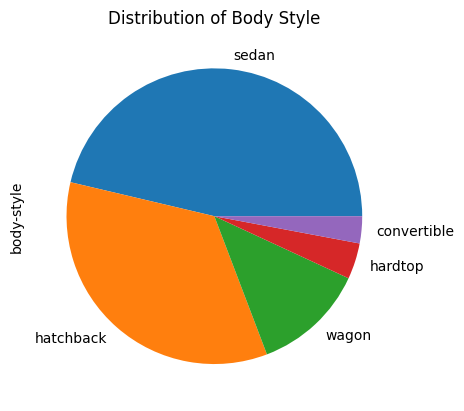

In [ ]:
df['body-style'].value_counts().plot(kind='pie')

plt.title('Distribution of Body Style')
plt.show()


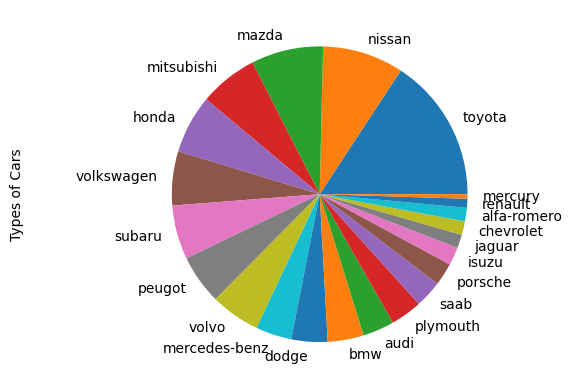

In [ ]:
df['make'].value_counts().plot(kind='pie')
ax = plt.gca()

ax.set_ylabel('Types of Cars', rotation=90, labelpad=40)
ax.yaxis.set_label_coords(-0.3, 0.5)

# show the plot
plt.show()

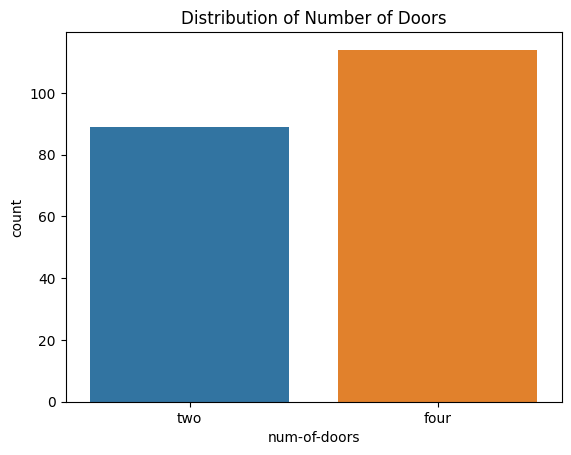

In [ ]:
sns.countplot(x='num-of-doors', data=df)
plt.title('Distribution of Number of Doors')
plt.show()


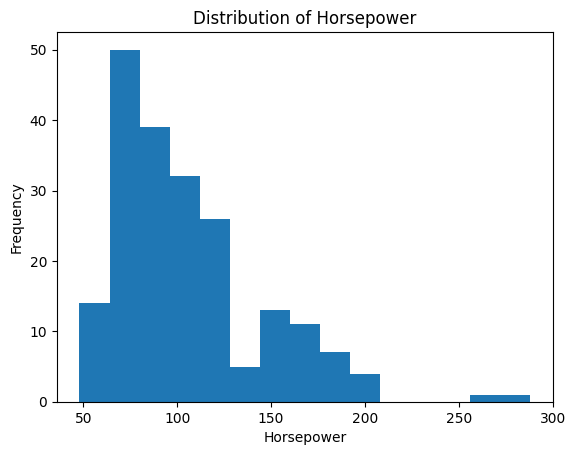

In [ ]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
plt.hist(df['horsepower'], bins=15)
plt.title('Distribution of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')


plt.show()


# Bivariate Analysis

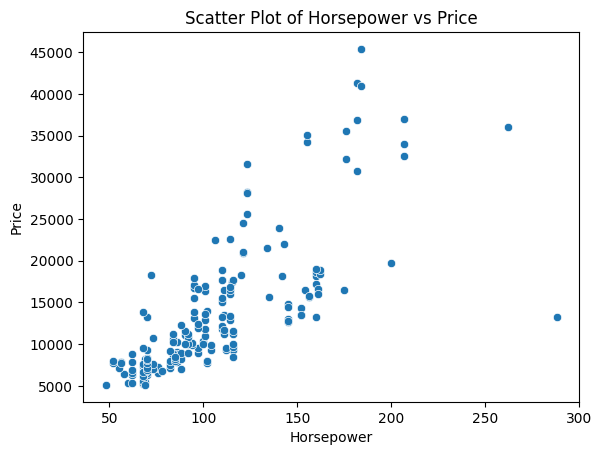

In [ ]:
df['horsepower'] = df['horsepower'].astype(float)
df['price'] = df['price'].astype(float)

sns.scatterplot(x='horsepower', y='price', data=df)

plt.title('Scatter Plot of Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()


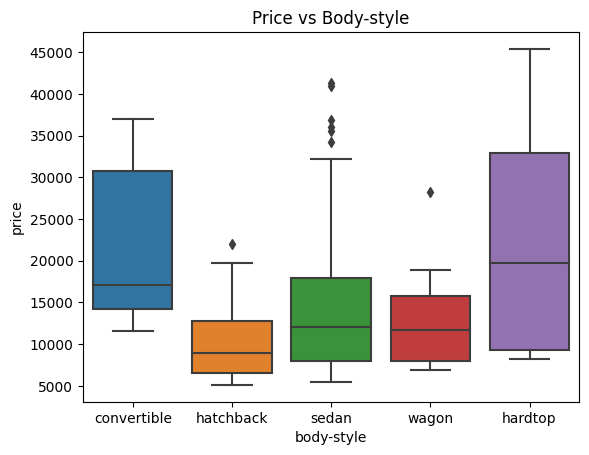

In [ ]:
sns.boxplot(x="body-style", y="price", data=df)
plt.title('Price vs Body-style')
plt.show()


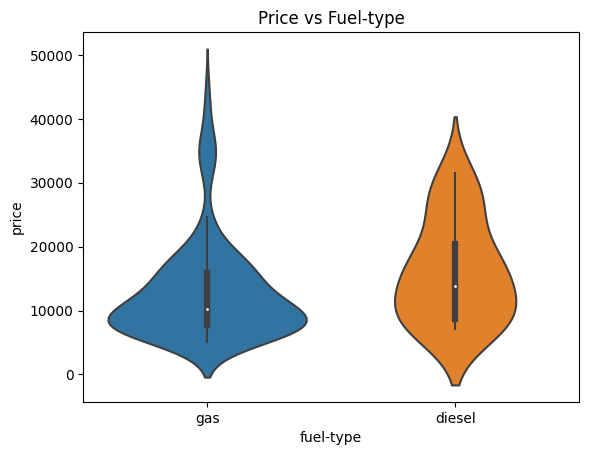

In [ ]:
sns.violinplot(x="fuel-type", y="price", data=df)
plt.title('Price vs Fuel-type')
plt.show()


# Multivariate Analysis

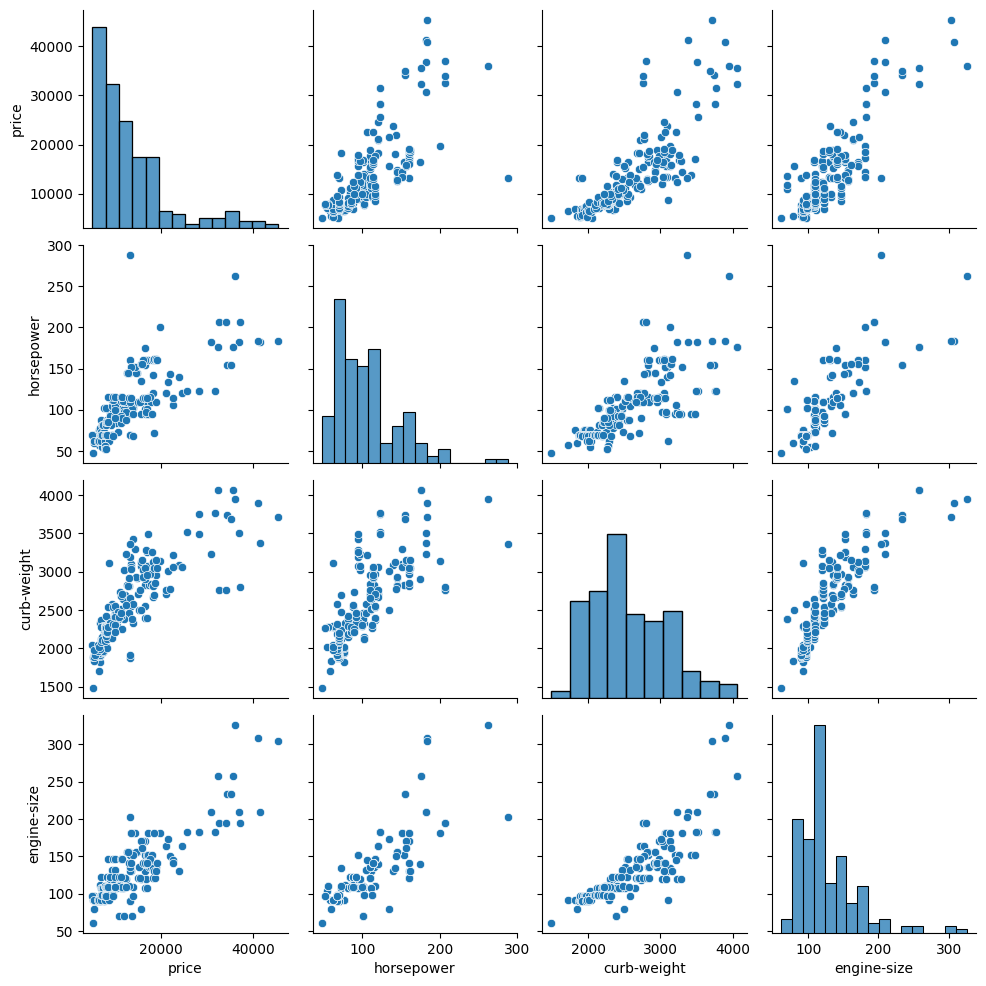

In [ ]:
sns.pairplot(df[['price', 'horsepower', 'curb-weight', 'engine-size']])
plt.show()


<ipython-input-21-5f1c574e7c14>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


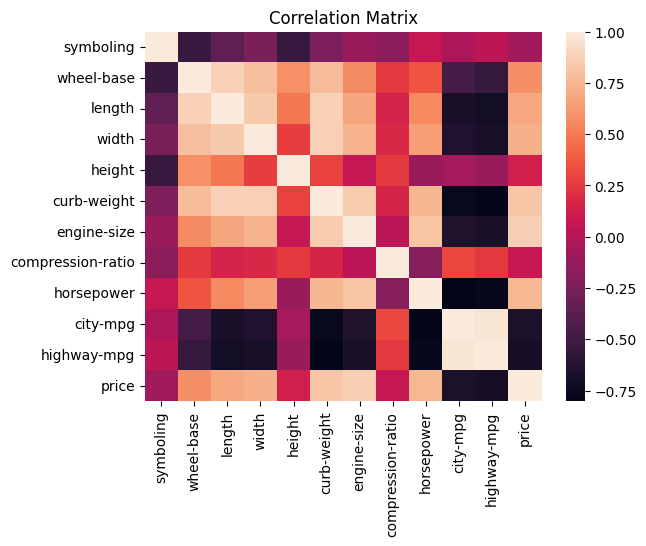

In [ ]:
sns.heatmap(df.corr())
plt.title('Correlation Matrix')
plt.show()


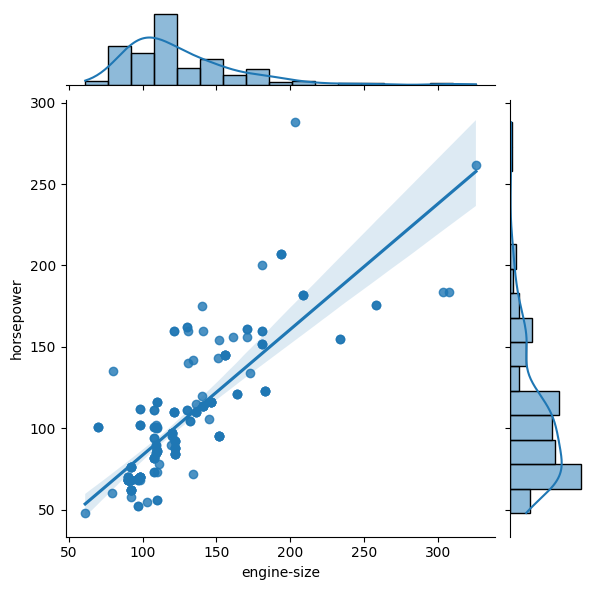

In [ ]:
sns.jointplot(x='engine-size', y='horsepower', data=df, kind='reg')
plt.show()


# Preprocessing


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   normalized-losses  203 non-null    object 
 2   make               203 non-null    object 
 3   fuel-type          203 non-null    object 
 4   aspiration         203 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         203 non-null    object 
 7   drive-wheels       203 non-null    object 
 8   engine-location    203 non-null    object 
 9   wheel-base         203 non-null    float64
 10  length             203 non-null    float64
 11  width              203 non-null    float64
 12  height             203 non-null    float64
 13  curb-weight        203 non-null    int64  
 14  engine-type        203 non-null    object 
 15  num-of-cylinders   203 non-null    object 
 16  engine-size        203 non

In [ ]:
categorical_indices = [1,2,3,4,5,6,7,8,14,15,17,18,19,21,22,25]
numerical_indices = [0,9,10,11,12,13,16,20,23,24]




In [ ]:
for i in categorical_indices:
    label_encoder = LabelEncoder()
    df.iloc[:, i] = label_encoder.fit_transform(df.iloc[:, i].astype(str))


In [37]:
num_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
            'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
            'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print(df.head())

   symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
0   1.734298          -0.622908     0          1           0             1   
1   1.734298          -0.622908     0          1           0             1   
2   0.130369          -0.622908     0          1           0             1   
3   0.932333           0.336607     1          1           0             0   
4   0.932333           0.336607     1          1           0             0   

   body-style  drive-wheels  engine-location  wheel-base  ...  engine-size  \
0           0             2                0   -1.689532  ...     0.070180   
1           0             2                0   -1.689532  ...     0.070180   
2           2             2                0   -0.710457  ...     0.597834   
3           3             1                0    0.169051  ...    -0.433489   
4           3             0                0    0.102673  ...     0.214086   

   fuel-system      bore    stroke  compression-ratio  horsepo

In [ ]:
numerical_columns = df.iloc[:, numerical_indices]
statistics = numerical_columns.describe()
# Print the descriptive statistics
print(statistics)


        symboling    wheel-base        length         width        height  \
count  203.000000  2.030000e+02  2.030000e+02  2.030000e+02  2.030000e+02   
mean     0.000000  2.283887e-15 -7.525453e-16 -3.500211e-17  9.975600e-16   
std      1.002472  1.002472e+00  1.002472e+00  1.002472e+00  1.002472e+00   
min     -2.275525 -2.021422e+00 -2.682120e+00 -2.617878e+00 -2.434444e+00   
25%     -0.671596 -7.104567e-01 -6.144698e-01 -8.462917e-01 -7.106610e-01   
50%      0.130369 -2.955945e-01 -7.419983e-02 -1.936021e-01  1.512303e-01   
75%      0.932333  6.005080e-01  7.463606e-01  4.590874e-01  7.258245e-01   
max      1.734298  3.670489e+00  2.761202e+00  2.976604e+00  2.490649e+00   

        curb-weight   engine-size  compression-ratio      city-mpg  \
count  2.030000e+02  2.030000e+02       2.030000e+02  2.030000e+02   
mean   1.050063e-16  1.170383e-16       1.487589e-16 -3.937737e-17   
std    1.002472e+00  1.002472e+00       1.002472e+00  1.002472e+00   
min   -2.052525e+00 -1.584

# Model Implementation and Evaluation

In [38]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.734298,-0.622908,0,1,0,1,0,2,0,-1.689532,...,0.070180,5,0.533279,-1.744901,-0.281853,-1.414739,-0.398126,-0.640559,-0.539468,-1.166140
1,1.734298,-0.622908,0,1,0,1,0,2,0,-1.689532,...,0.070180,5,0.533279,-1.744901,-0.281853,-1.414739,-0.398126,-0.640559,-0.539468,-0.811200
2,0.130369,-0.622908,0,1,0,1,2,2,0,-0.710457,...,0.597834,5,-1.674060,0.916701,-0.281853,-0.590422,-0.398126,-0.947604,-0.685290,-0.811200
3,0.932333,0.336607,1,1,0,0,3,1,0,0.169051,...,-0.433489,5,-0.522405,0.584001,-0.024030,-1.634557,0.902420,-0.179992,-0.102003,-1.072735
4,0.932333,0.336607,1,1,0,0,3,0,0,0.102673,...,0.214086,5,-0.522405,0.584001,-0.539676,-1.249876,0.902420,-1.101126,-1.268577,-0.605708


In [39]:
X = df.iloc[:,:25]
y = df['price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(162, 25)
(41, 25)
(162,)
(41,)


In [41]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1.0578473613733177


In [43]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(random_state=42)
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.8370559928205328


In [45]:
import xgboost as xgb
train_data = xgb.DMatrix(data=X_train, label=y_train)
test_data = xgb.DMatrix(data=X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',  
    'eval_metric': 'rmse', 
    'max_depth': 3, 
    'learning_rate': 0.1
}

model = xgb.train(params=params, dtrain=train_data)

y_pred = model.predict(test_data)

rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.9396405013082666
